In [0]:
!pip install pandas
!pip install nltk
!pip install numpy
!pip install gensim
!pip install scikit-learn
!pip install matplotlib

In [0]:
ls

In [0]:
#Download Google Drive Dependencies
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [0]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print 'Files in Drive:'
!ls drive/

# Create a file in Drive.
!echo "This newly created file will appear in your Drive file list." > drive/created.txt

In [0]:
ls drive

In [0]:
import os
os.chdir("drive")

In [0]:
ls

In [0]:
import pandas as pd
import nltk
import math
import codecs
import csv
import sys
import math
from nltk.corpus import stopwords
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import os

model_save_root = os.path.join('colab_tests','cluster_tests')
model_name = "movie-trained.model"
filename = os.path.join('colab_tests','cluster_tests','movies_metadata.csv')
test_filename = os.path.join('colab_tests','cluster_tests','test_movies_metadata.csv')

data = pd.read_csv(filename)
overview = data['overview'].astype('str').tolist()

# Split 90 - 10
total_length = len(overview)
test_length = int(math.floor(((total_length * 10)/100)))
train_length = total_length - test_length


# Shuffle the list
overview = filter(bool, overview)
overview = shuffle(overview)
train_set = overview[0:train_length]
test_set = overview[train_length: total_length]

#Create test csv from the test set
print("creating test file")
test_data_frame = pd.DataFrame(test_set, columns=["overview"])
test_data_csv = test_data_frame.to_csv()
test_file_handler = open(test_filename,"w+")
test_file_handler.write(test_data_csv)
test_file_handler.close()

class Documents(object):
    def __init__(self, documents):
        self.documents = documents

    def __iter__(self):
        for i, doc in enumerate(self.documents):
            yield TaggedDocument(words=doc, tags=[i])


documents = Documents(train_set)

model = Doc2Vec(vector_size=100, dbow_words=1, dm=0, epochs=20,  window=2, min_count=2, workers=4)

model.build_vocab(documents)

In [0]:
print("Training on {} documents".format(model.corpus_count))
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)


In [0]:
checkpoint_save_path = os.path.join(model_save_root,str(model.epochs)+"_cluster.model")
model.save(checkpoint_save_path)

Initialization complete
Iteration  0, inertia 1857.012
Iteration  1, inertia 820.510
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.804906e-07
Initialization complete
Iteration  0, inertia 4721.072
Iteration  1, inertia 820.510
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.804906e-07
Initialization complete
Iteration  0, inertia 1440.763
Iteration  1, inertia 820.510
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.804906e-07
Initialization complete
Iteration  0, inertia 1875.156
Iteration  1, inertia 820.510
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.804906e-07
Initialization complete
Iteration  0, inertia 999.389
Iteration  1, inertia 820.510
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.804906e-07
Initialization complete
Iteration  0, inertia 1612.061
Iteration  1, inertia 820.510
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.804906e-07

Iteration 0, inertia 379.9696911488466
start iteration
done sorting
end inner loop
Iteration 1, inertia 371.39048191164255
start iteration
done sorting
end inner loop
Iteration 2, inertia 366.0576543467061
start iteration
done sorting
end inner loop
Iteration 3, inertia 362.15041561033155
start iteration
done sorting
end inner loop
Iteration 4, inertia 359.0930769050056
start iteration
done sorting
end inner loop
Iteration 5, inertia 355.47360103281363
start iteration
done sorting
end inner loop
Iteration 6, inertia 349.3327808528725
start iteration
done sorting
end inner loop
Iteration 7, inertia 339.0900124124774
start iteration
done sorting
end inner loop
Iteration 8, inertia 335.3554059058247
start iteration
done sorting
end inner loop
Iteration 9, inertia 335.02271172914266
start iteration
done sorting
end inner loop
Iteration 10, inertia 334.9565935745489
start iteration
done sorting
end inner loop
Iteration 11, inertia 334.9242290438558
start iteration
done sorting
end inner loo

start iteration
done sorting
end inner loop
Iteration 9, inertia 285.010004804195
center shift 2.130964e-04 within tolerance 1.804906e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 315.42424726498643
start iteration
done sorting
end inner loop
Iteration 1, inertia 308.7411094880772
start iteration
done sorting
end inner loop
Iteration 2, inertia 292.63543279595444
start iteration
done sorting
end inner loop
Iteration 3, inertia 286.6699923375166
start iteration
done sorting
end inner loop
Iteration 4, inertia 285.8057196250696
start iteration
done sorting
end inner loop
Iteration 5, inertia 285.44779110257406
start iteration
done sorting
end inner loop
Iteration 6, inertia 285.25612403197044
start iteration
done sorting
end inner loop
Iteration 7, inertia 285.15528034283045
start iteration
done sorting
end inner loop
Iteration 8, inertia 285.10489082859624
start iteration
done sorting
end inner loop
Iteration 9, inertia 285.07665966502475
s

Iteration 12, inertia 270.8263782356608
start iteration
done sorting
end inner loop
Iteration 13, inertia 270.8260461857782
start iteration
done sorting
end inner loop
Iteration 14, inertia 270.8255304923914
start iteration
done sorting
end inner loop
Iteration 15, inertia 270.82487331714196
start iteration
done sorting
end inner loop
Iteration 16, inertia 270.82415872015656
start iteration
done sorting
end inner loop
Iteration 17, inertia 270.82379161814293
start iteration
done sorting
end inner loop
Iteration 18, inertia 270.8234387820368
start iteration
done sorting
end inner loop
Iteration 19, inertia 270.823130816075
start iteration
done sorting
end inner loop
Iteration 20, inertia 270.82275182722304
start iteration
done sorting
end inner loop
Iteration 21, inertia 270.82190946450334
start iteration
done sorting
end inner loop
Iteration 22, inertia 270.8206777341305
start iteration
done sorting
end inner loop
Iteration 23, inertia 270.81942898559436
start iteration
done sorting
en

end inner loop
Iteration 11, inertia 271.5473761685281
start iteration
done sorting
end inner loop
Iteration 12, inertia 271.5228559802031
start iteration
done sorting
end inner loop
Iteration 13, inertia 271.464209952451
start iteration
done sorting
end inner loop
Iteration 14, inertia 271.3284043206707
start iteration
done sorting
end inner loop
Iteration 15, inertia 271.2004203506532
start iteration
done sorting
end inner loop
Iteration 16, inertia 271.2002549461891
start iteration
done sorting
end inner loop
Iteration 17, inertia 271.2002549461891
center shift 0.000000e+00 within tolerance 1.804906e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 287.6534244564691
start iteration
done sorting
end inner loop
Iteration 1, inertia 273.7685349780242
start iteration
done sorting
end inner loop
Iteration 2, inertia 272.0682786932728
start iteration
done sorting
end inner loop
Iteration 3, inertia 270.81590049626766
start iteration
done sorting


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 282.4328304325627
start iteration
done sorting
end inner loop
Iteration 1, inertia 268.4218449835904
start iteration
done sorting
end inner loop
Iteration 2, inertia 262.1129029907278
start iteration
done sorting
end inner loop
Iteration 3, inertia 256.96538409718454
start iteration
done sorting
end inner loop
Iteration 4, inertia 255.17053917947297
start iteration
done sorting
end inner loop
Iteration 5, inertia 255.12577860238082
start iteration
done sorting
end inner loop
Iteration 6, inertia 255.1117402771494
start iteration
done sorting
end inner loop
Iteration 7, inertia 255.05243027067237
start iteration
done sorting
end inner loop
Iteration 8, inertia 254.8571279335944
start iteration
done sorting
end inner loop
Iteration 9, inertia 254.24691563243533
start iteration
done sorting
end inner loop
Iteration 10, inertia 254.08851112682763
start iteration
done sorting
end inner loop
Iteration 11

end inner loop
Iteration 20, inertia 250.7467975789202
start iteration
done sorting
end inner loop
Iteration 21, inertia 250.74571701184155
start iteration
done sorting
end inner loop
Iteration 22, inertia 250.74443553110112
start iteration
done sorting
end inner loop
Iteration 23, inertia 250.7430109607448
start iteration
done sorting
end inner loop
Iteration 24, inertia 250.74256437940141
start iteration
done sorting
end inner loop
Iteration 25, inertia 250.74247204844787
center shift 2.611659e-04 within tolerance 1.804906e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 269.82093703526766
start iteration
done sorting
end inner loop
Iteration 1, inertia 261.21408895870525
start iteration
done sorting
end inner loop
Iteration 2, inertia 253.9543762157886
start iteration
done sorting
end inner loop
Iteration 3, inertia 251.72968193869806
start iteration
done sorting
end inner loop
Iteration 4, inertia 249.2872089441558
start iteration
done so

Iteration 10, inertia 246.4726637787618
start iteration
done sorting
end inner loop
Iteration 11, inertia 246.4723317288791
start iteration
done sorting
end inner loop
Iteration 12, inertia 246.47181603549248
start iteration
done sorting
end inner loop
Iteration 13, inertia 246.47115886024287
start iteration
done sorting
end inner loop
Iteration 14, inertia 246.4704442632575
start iteration
done sorting
end inner loop
Iteration 15, inertia 246.47007716124398
start iteration
done sorting
end inner loop
Iteration 16, inertia 246.46972432513778
start iteration
done sorting
end inner loop
Iteration 17, inertia 246.46941635917585
start iteration
done sorting
end inner loop
Iteration 18, inertia 246.46903737032397
start iteration
done sorting
end inner loop
Iteration 19, inertia 246.4681950076043
start iteration
done sorting
end inner loop
Iteration 20, inertia 246.4669632772316
start iteration
done sorting
end inner loop
Iteration 21, inertia 246.46571452869534
start iteration
done sorting


Iteration 13, inertia 239.6648934404932
start iteration
done sorting
end inner loop
Iteration 14, inertia 239.65887256330845
start iteration
done sorting
end inner loop
Iteration 15, inertia 239.65243508282236
start iteration
done sorting
end inner loop
Iteration 16, inertia 239.64865074144734
start iteration
done sorting
end inner loop
Iteration 17, inertia 239.64745662627965
start iteration
done sorting
end inner loop
Iteration 18, inertia 239.6469407968173
start iteration
done sorting
end inner loop
Iteration 19, inertia 239.64689724733546
center shift 2.914401e-04 within tolerance 1.804906e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 259.70976699332647
start iteration
done sorting
end inner loop
Iteration 1, inertia 250.32423460493945
start iteration
done sorting
end inner loop
Iteration 2, inertia 245.56104641718932
start iteration
done sorting
end inner loop
Iteration 3, inertia 239.13013320646286
start iteration
done sorting
end in


Iteration 10, inertia 230.17334569102505
start iteration
done sorting
end inner loop
Iteration 11, inertia 230.1667147805112
start iteration
done sorting
end inner loop
Iteration 12, inertia 230.16023462302775
start iteration
done sorting
end inner loop
Iteration 13, inertia 230.1544070385348
start iteration
done sorting
end inner loop
Iteration 14, inertia 230.1501022051507
start iteration
done sorting
end inner loop
Iteration 15, inertia 230.14533460937713
start iteration
done sorting
end inner loop
Iteration 16, inertia 230.14339094695163
start iteration
done sorting
end inner loop
Iteration 17, inertia 230.1416995254644
start iteration
done sorting
end inner loop
Iteration 18, inertia 230.14007588766063
start iteration
done sorting
end inner loop
Iteration 19, inertia 230.1385433875092
start iteration
done sorting
end inner loop
Iteration 20, inertia 230.1366866141241
start iteration
done sorting
end inner loop
Iteration 21, inertia 230.13478329878953
start iteration
done sorting



end inner loop
Iteration 20, inertia 225.01260708774433
start iteration
done sorting
end inner loop
Iteration 21, inertia 225.01252438612752
start iteration
done sorting
end inner loop
Iteration 22, inertia 225.0123259299624
start iteration
done sorting
end inner loop
Iteration 23, inertia 225.01220437803036
start iteration
done sorting
end inner loop
Iteration 24, inertia 225.01220437803036
center shift 0.000000e+00 within tolerance 1.804906e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 256.2783249850015
start iteration
done sorting
end inner loop
Iteration 1, inertia 243.2548052422239
start iteration
done sorting
end inner loop
Iteration 2, inertia 237.38839060291582
start iteration
done sorting
end inner loop
Iteration 3, inertia 232.02578100104745
start iteration
done sorting
end inner loop
Iteration 4, inertia 228.42122319815059
start iteration
done sorting
end inner loop
Iteration 5, inertia 227.73530321537163
start iteration
done s

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 254.17689251751028
start iteration
done sorting
end inner loop
Iteration 1, inertia 241.35142672826314
start iteration
done sorting
end inner loop
Iteration 2, inertia 239.6288165915099
start iteration
done sorting
end inner loop
Iteration 3, inertia 238.15611355261194
start iteration
done sorting
end inner loop
Iteration 4, inertia 236.4879987937015
start iteration
done sorting
end inner loop
Iteration 5, inertia 233.73921186021698
start iteration
done sorting
end inner loop
Iteration 6, inertia 229.11877787930044
start iteration
done sorting
end inner loop
Iteration 7, inertia 228.1095185732544
start iteration
done sorting
end inner loop
Iteration 8, inertia 227.98874042486293
start iteration
done sorting
end inner loop
Iteration 9, inertia 227.93586630741726
start iteration
done sorting
end inner loop
Iteration 10, inertia 227.90642009896635
start iteration
done sorting
end inner loop
Iteration 

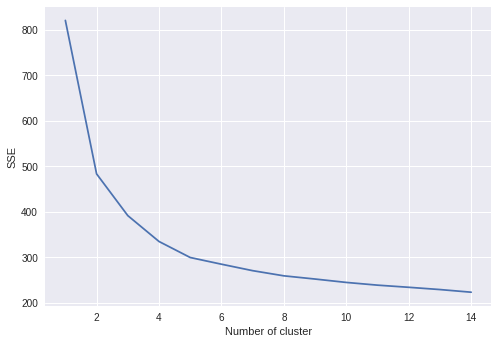

In [22]:
#Create cluster using K-Means
#Only creates graph
import matplotlib
#matplotlib.use('Agg')
import re
import os
import nltk, math, codecs
import csv
from nltk.corpus import stopwords
from gensim.models import Doc2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

model_name = checkpoint_save_path
loaded_model = Doc2Vec.load(model_name)

#Load the test csv file
data = pd.read_csv(test_filename)
overview = data['overview'].astype('str').tolist()
overview = filter(bool, overview)
vectors = []

def split_words(text):
  return ''.join([x if x.isalnum() or x.isspace() else " " for x in text ]).split()

def preprocess_document(text):
  sp_words = split_words(text)
  return sp_words

for i, t in enumerate(overview):
  vectors.append(loaded_model.infer_vector(preprocess_document(t)))

sse = {}
for k in range(1,15):
  km = KMeans(n_clusters=k, max_iter=1000, verbose = 0).fit(vectors)
  sse[k] = km.inertia_
  
best_cluster_size = 1
min_error = float("inf")

for cluster_size in sse:
    if sse[cluster_size] < min_error:
        min_error = sse[cluster_size]
        best_cluster_size = cluster_size

print(sse)

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
#plt.savefig("sse_vs_number_of_clusters.png")

  

In [0]:
#Create cluster using K-Means
import matplotlib
#matplotlib.use('Agg')
import re
import os
import nltk, math, codecs
import csv
from nltk.corpus import stopwords
from gensim.models import Doc2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

model_name = checkpoint_save_path
loaded_model = Doc2Vec.load(model_name)

#Load the test csv file
data = pd.read_csv(test_filename)
overview = data['overview'].astype('str').tolist()
overview = filter(bool, overview)
vectors = []

def split_words(text):
  return ''.join([x if x.isalnum() or x.isspace() else " " for x in text ]).split()

def preprocess_document(text):
  sp_words = split_words(text)
  return sp_words

for i, t in enumerate(overview):
  vectors.append(loaded_model.infer_vector(preprocess_document(t)))

km = KMeans(n_clusters=5, max_iter=1000, verbose = 0).fit(vectors)
clusters = km.labels_.tolist()
csvRows = []

for idx in range(len(overview)):
    csvRows.append({
        'overview': overview[idx],
        'cluster': clusters[idx]
    })

    
csv_data_frame = pd.DataFrame(csvRows, columns=["cluster","overview"])
cluster_csv = csv_data_frame.to_csv()

cluster_file_handler = open(os.path.join(model_save_root,"cluster.csv"),"w+")
cluster_file_handler.write(cluster_csv)
cluster_file_handler.close()